In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications as app
from tensorflow.keras.applications.xception import Xception
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#Check the GPU is assigned or not 
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "nabeelansari1"
os.environ['KAGGLE_KEY'] = "fa6d11e6450c35ac6677a6adb35a0e76"
!kaggle datasets download -d gpiosenka/100-bird-species

 98% 849M/871M [00:09<00:00, 108MB/s]
100% 871M/871M [00:10<00:00, 90.7MB/s]


In [ ]:
#changing the working directory
%cd /content/Kaggle  
#Check the present working directory using pwd command

/content/Kaggle


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
train = '/content/Kaggle/train'
test = '/content/Kaggle/test'
valid = '/content/Kaggle/valid'

In [ ]:
n_classes = len(train.class_indices)
batch_size = 64
input_shape = (224, 224, 3)

Data Generator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_data = datagen.flow_from_directory(train, target_size=input_shape[0:2], class_mode='categorical', batch_size=batch_size, shuffle=True)
val_data = datagen.flow_from_directory(valid, target_size=input_shape[0:2], class_mode='categorical', batch_size=batch_size, shuffle=True)
test_data = datagen.flow_from_directory(test, target_size=input_shape[0:2], class_mode='categorical', batch_size=batch_size, shuffle=True)

Found 38518 images belonging to 270 classes.
Found 1350 images belonging to 270 classes.
Found 1350 images belonging to 270 classes.


Model Creation

In [ ]:
xp = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
xp.trainable = False

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()

model.add(xp)
model.add(Flatten())
model.add(Dense(units=1098, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(270, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1098)              110187594 
_________________________________________________________________
dropout (Dropout)            (None, 1098)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 270)               296730    
Total params: 131,345,804
Trainable params: 110,484,324
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.000005), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=30, steps_per_epoch=len(train_data), verbose=1, validation_data=val_data, validation_steps=len(val_data), use_multiprocessing=True, workers=10)

Epoch 1/30
602/602 [==============================] - 244s 347ms/step - loss: 3.2361 - accuracy: 0.3560 - val_loss: 1.2022 - val_accuracy: 0.7985
Epoch 2/30
602/602 [==============================] - 219s 358ms/step - loss: 1.4207 - accuracy: 0.6697 - val_loss: 0.6470 - val_accuracy: 0.8822
Epoch 3/30
602/602 [==============================] - 218s 357ms/step - loss: 0.9755 - accuracy: 0.7653 - val_loss: 0.4658 - val_accuracy: 0.9015
Epoch 4/30
602/602 [==============================] - 218s 357ms/step - loss: 0.7527 - accuracy: 0.8148 - val_loss: 0.3743 - val_accuracy: 0.9156
Epoch 5/30
602/602 [==============================] - 218s 358ms/step - loss: 0.6219 - accuracy: 0.8479 - val_loss: 0.3211 - val_accuracy: 0.9207
Epoch 6/30
602/602 [==============================] - 218s 358ms/step - loss: 0.5126 - accuracy: 0.8739 - val_loss: 0.2833 - val_accuracy: 0.9341
Epoch 7/30
602/602 [==============================] - 218s 358ms/step - loss: 0.4392 - accuracy: 0.8904 - val_loss: 0.2609 -

In [ ]:
model.evaluate(test_data)

22/22 [==============================] - 6s 284ms/step - loss: 0.1081 - accuracy: 0.9711


[0.10809049010276794, 0.9711111187934875]

In [ ]:
model.save('/content/Kaggle/birds.h5')

Data Visualization

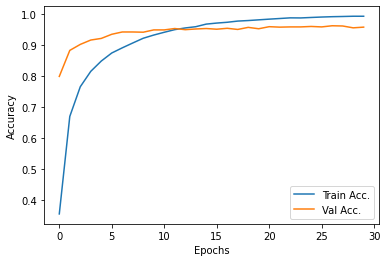

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot([i for i in range(len(history.history['accuracy']))], history.history['accuracy'], label='Train Acc.')
plt.plot([i for i in range(len(history.history['val_accuracy']))], history.history['val_accuracy'], label='Val Acc.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

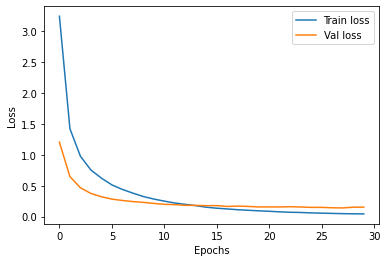

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot([i for i in range(len(history.history['loss']))], history.history['loss'], label='Train loss')
sns.lineplot([i for i in range(len(history.history['val_loss']))], history.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()